In [1]:
import pennylane as qml
import pennylane.templates as qmlt
import torch
import os
import random
import numpy as np

In [2]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [3]:
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

In [4]:
@qml.qnode(qml.device("default.qubit", wires=n_qubits), interface="torch")
def circuit(inputs, weights):
    qmlt.AngleEmbedding(inputs, wires=range(n_qubits))
    qmlt.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [5]:
inputs = torch.randn(n_qubits)
weights = torch.randn(n_qubits, n_qubits)

In [6]:
print(inputs)
print(weights)

tensor([0.3367, 0.1288, 0.2345, 0.2303])
tensor([[ 1.7878, -0.4780, -0.2429, -0.9342],
        [-0.2483, -1.2082, -0.4777,  0.5201],
        [-1.5673, -0.2394,  2.3228, -0.9634],
        [ 2.0024,  0.4664,  1.5730, -0.9228]])


0: ──RX(0.34)──RX(1.79)──╭●───────╭X──RX(-0.25)─╭●───────╭X──RX(-1.57)─╭●───────╭X──RX(2.00)──╭●───
1: ──RX(0.13)──RX(-0.48)─╰X─╭●────│───RX(-1.21)─╰X─╭●────│───RX(-0.24)─╰X─╭●────│───RX(0.47)──╰X─╭●
2: ──RX(0.23)──RX(-0.24)────╰X─╭●─│───RX(-0.48)────╰X─╭●─│───RX(2.32)─────╰X─╭●─│───RX(1.57)─────╰X
3: ──RX(0.23)──RX(-0.93)───────╰X─╰●──RX(0.52)────────╰X─╰●──RX(-0.96)───────╰X─╰●──RX(-0.92)──────

─────╭X─┤  <Z>
─────│──┤  <Z>
──╭●─│──┤  <Z>
──╰X─╰●─┤  <Z>


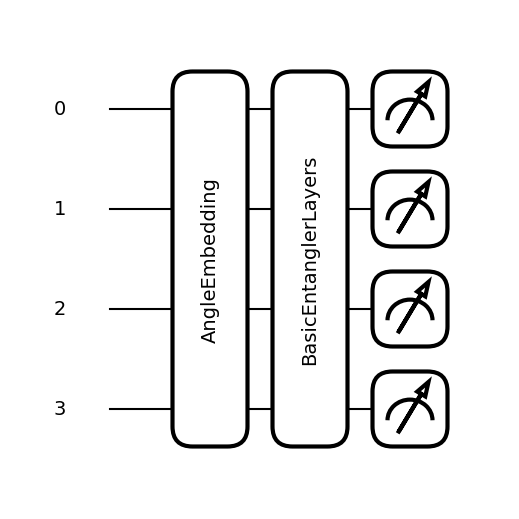

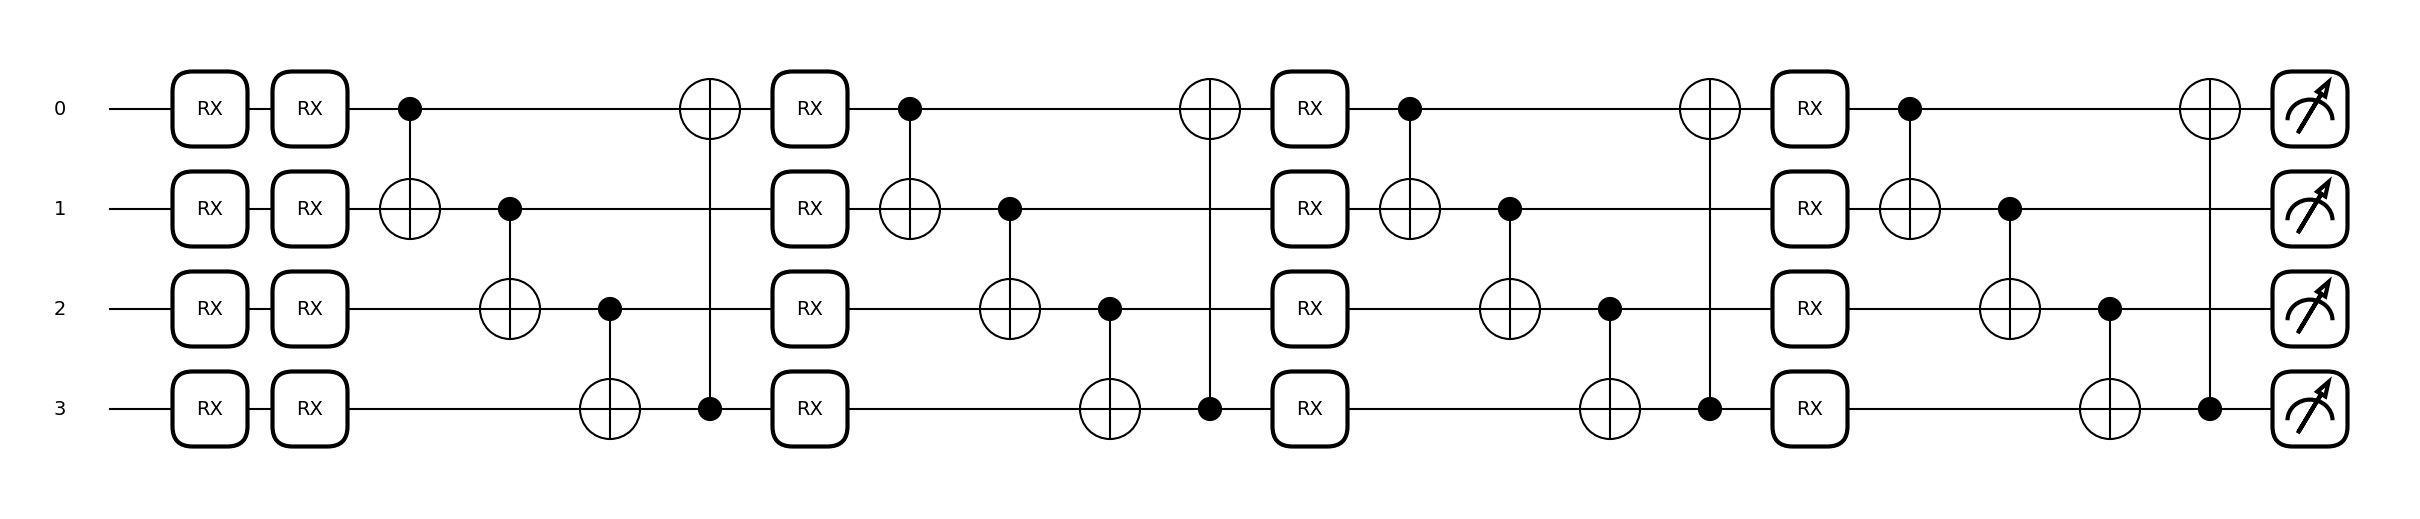

In [7]:
# qml.drawer.use_style("pennylane")
print(qml.draw(circuit, expansion_strategy="device")(inputs, weights))
fig1, ax = qml.draw_mpl(circuit)(inputs, weights)
fig2, ax = qml.draw_mpl(circuit, expansion_strategy="device")(inputs, weights)

0: ──RZ(1.11)───RZ(-1.38)─╭●───────╭X──RZ(0.32)──╭●───────╭X──RZ(-1.56)─╭●───────╭X──RZ(-1.27)─╭●───
1: ──RZ(-1.69)──RZ(-0.87)─╰X─╭●────│───RZ(-0.42)─╰X─╭●────│───RZ(1.00)──╰X─╭●────│───RZ(2.12)──╰X─╭●
2: ──RZ(-0.99)──RZ(-0.22)────╰X─╭●─│───RZ(0.31)─────╰X─╭●─│───RZ(-0.88)────╰X─╭●─│───RZ(-1.23)────╰X
3: ──RZ(0.96)───RZ(1.72)────────╰X─╰●──RZ(-0.77)───────╰X─╰●──RZ(-0.60)───────╰X─╰●──RZ(-0.49)──────

─────╭X─┤  <Z>
─────│──┤  <Z>
──╭●─│──┤  <Z>
──╰X─╰●─┤  <Z>


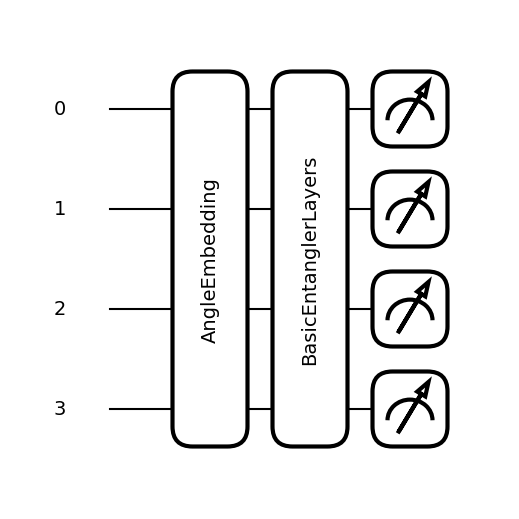

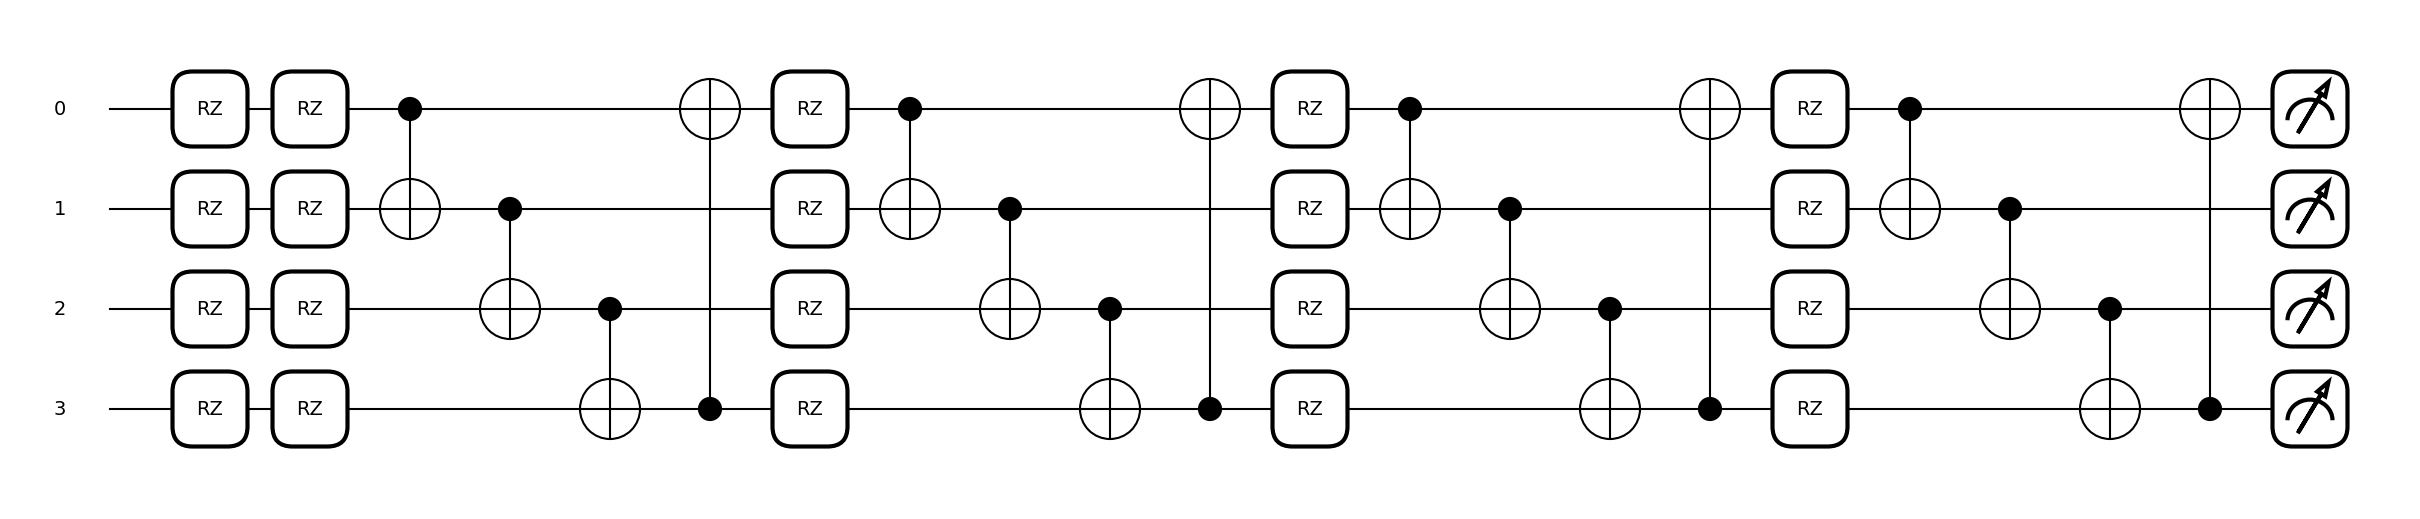

In [8]:
@qml.qnode(qml.device("default.qubit", wires=n_qubits), interface="torch")
def circuit(inputs, weights):
    qmlt.AngleEmbedding(inputs, wires=range(n_qubits), rotation="Z")
    qmlt.BasicEntanglerLayers(weights, wires=range(n_qubits), rotation=qml.RZ)
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]


inputs = torch.randn(n_qubits)
weights = torch.randn(n_qubits, n_qubits)

print(qml.draw(circuit, expansion_strategy="device")(inputs, weights))
fig1, ax = qml.draw_mpl(circuit)(inputs, weights)
fig2, ax = qml.draw_mpl(circuit, expansion_strategy="device")(inputs, weights)

In [9]:
import pennylane as qml
import numpy as np

# Define the angles you want to encode
angles = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5]

# Initialize a quantum device (in this case, a simulator)
dev = qml.device("default.qubit", wires=3)


@qml.qnode(qml.device("default.qubit", wires=n_qubits), interface="torch")
def multiple_angle_embedding_circuit(features):
    # Encode the first 3 features as angles for x rotations
    qml.AngleEmbedding(features[:3], wires=range(3), rotation="X")

    # Encode the next 3 features as angles for z rotations
    qml.AngleEmbedding(features[3:6], wires=range(3), rotation="Z")

    # Encode the last 2 features as angles for y rotations
    qml.AngleEmbedding(features[6:], wires=[0, 1], rotation="Y")

    return qml.state()


# Execute the circuit and get the quantum state
quantum_state = multiple_angle_embedding_circuit(angles)

# Print the quantum state
print(quantum_state)

tensor([ 0.1661-0.4570j,  0.0000+0.0000j, -0.0151-0.1232j,  0.0000+0.0000j,
         0.0921-0.5659j,  0.0000+0.0000j, -0.0446-0.1395j,  0.0000+0.0000j,
         0.1057-0.3809j,  0.0000+0.0000j, -0.0201-0.0989j,  0.0000+0.0000j,
         0.0388-0.4645j,  0.0000+0.0000j, -0.0450-0.1102j,  0.0000+0.0000j],
       dtype=torch.complex128)


0: ──RX(0.10)──RZ(0.70)──RY(1.30)─┤ ╭State
1: ──RX(0.30)──RZ(0.90)──RY(1.50)─┤ ├State
2: ──RX(0.50)──RZ(1.10)───────────┤ ├State
3: ───────────────────────────────┤ ╰State


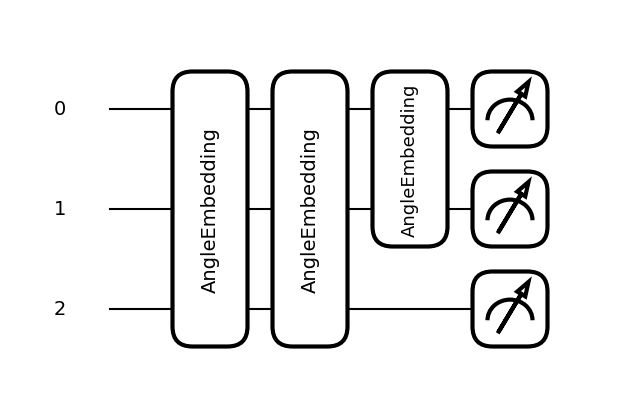

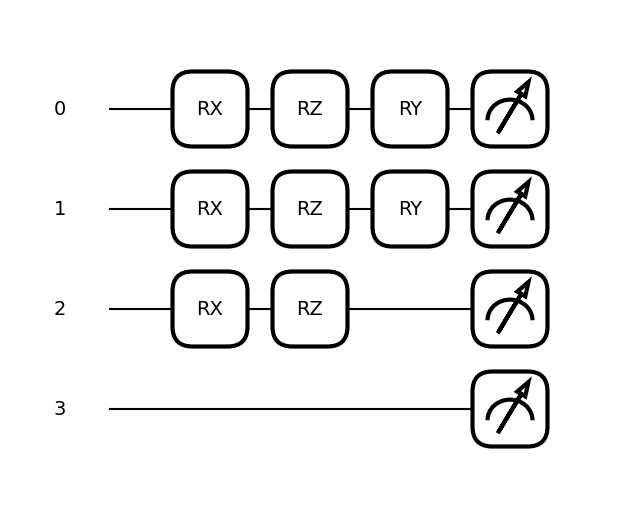

In [10]:
print(qml.draw(multiple_angle_embedding_circuit, expansion_strategy="device")(angles))
fig1, ax = qml.draw_mpl(multiple_angle_embedding_circuit)(angles)
fig2, ax = qml.draw_mpl(multiple_angle_embedding_circuit, expansion_strategy="device")(
    angles
)

Rot(ϕ,θ,ω) = RZ(ω)RY(θ)RZ(ϕ)

0: ──RZ(0.28)───Rot(0.60,0.71,0.02)─╭●───────╭X──Rot(0.61,0.14,0.29)─╭●────╭X────┤  <Z>
1: ──RZ(0.06)───Rot(0.97,0.83,0.21)─╰X─╭●────│───Rot(0.37,0.46,0.79)─│──╭●─│──╭X─┤  <Z>
2: ──RZ(0.52)───Rot(0.18,0.18,0.30)────╰X─╭●─│───Rot(0.20,0.51,0.59)─╰X─│──╰●─│──┤  <Z>
3: ──RZ(-0.24)──Rot(0.52,0.43,0.29)───────╰X─╰●──Rot(0.05,0.61,0.17)────╰X────╰●─┤  <Z>


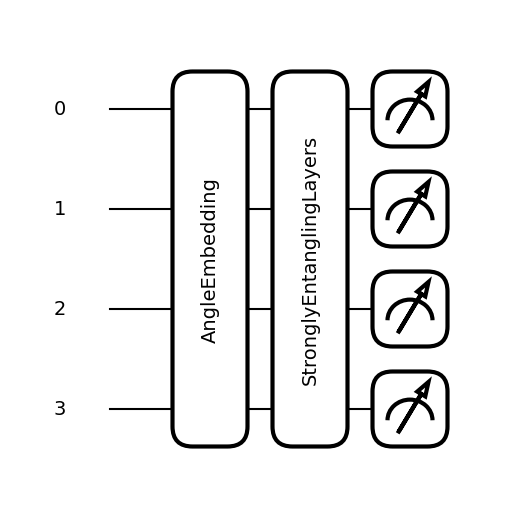

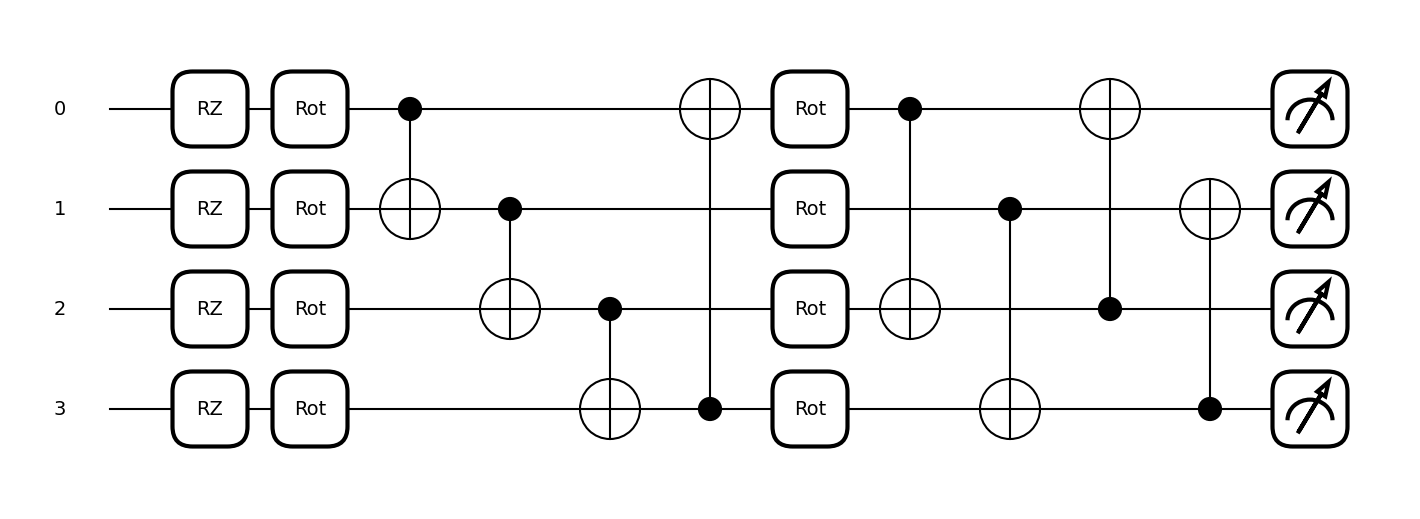

In [11]:
n_qubits = 4
n_qlayers = 2
dev = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(qml.device("default.qubit", wires=n_qubits), interface="torch")
def circuit(inputs, weights):
    qmlt.AngleEmbedding(inputs, wires=range(n_qubits), rotation="Z")
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]


inputs = torch.randn(n_qubits)
weights = torch.randn(n_qlayers, n_qubits, 3)

shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=4)
weights = np.random.random(size=shape)

print(qml.draw(circuit, expansion_strategy="device")(inputs, weights))
fig1, ax = qml.draw_mpl(circuit)(inputs, weights)
fig2, ax = qml.draw_mpl(circuit, expansion_strategy="device")(inputs, weights)

In [15]:
dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def circuit(parameters):
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(4))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]


shape = qml.StronglyEntanglingLayers.shape(n_layers=n_qlayers, n_wires=n_qubits)
weights = np.random.random(size=shape)

print(weights.shape)

print(qml.draw(circuit, expansion_strategy="device")(weights))

(2, 4, 3)
0: ──Rot(0.52,0.96,0.84)─╭●───────╭X──Rot(0.42,0.39,0.29)─╭●────╭X────┤  <Z>
1: ──Rot(0.75,0.54,0.59)─╰X─╭●────│───Rot(0.01,0.20,0.71)─│──╭●─│──╭X─┤  <Z>
2: ──Rot(0.97,0.61,0.28)────╰X─╭●─│───Rot(0.79,0.61,0.93)─╰X─│──╰●─│──┤  <Z>
3: ──Rot(0.30,0.17,0.02)───────╰X─╰●──Rot(0.65,0.91,0.85)────╰X────╰●─┤  <Z>


In [16]:
print(qml.StronglyEntanglingLayers.shape(n_layers=n_qlayers, n_wires=n_qubits))

(2, 4, 3)


In [18]:
print(qml.BasicEntanglerLayers.shape(n_layers=n_qlayers, n_wires=n_qubits))

(2, 4)


In [13]:
# import torch.nn.functional as F

# # Optionally use the context manager to ensure one of the fused kernels is run
# query = torch.rand(32, 8, 128, 64, dtype=torch.float16, device="cuda")
# key = torch.rand(32, 8, 128, 64, dtype=torch.float16, device="cuda")
# value = torch.rand(32, 8, 128, 64, dtype=torch.float16, device="cuda")
# with torch.backends.cuda.sdp_kernel(enable_math=False):
#     F.scaled_dot_product_attention(query, key, value)